In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# Membaca gambar
image_path = 'WhatsApp Image 2025-05-07 at 21.40.57_d0d186ed.jpg'
image = cv2.imread(image_path)

In [151]:
# Fungsi untuk deteksi warna
def detect_color(image, lower, upper):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
    gray[gray == 0] = 255
    return gray

In [153]:
# Deteksi warna biru
blue_lower = np.array([100, 150, 0])
blue_upper = np.array([140, 255, 255])
blue = detect_color(image, blue_lower, blue_upper)

In [155]:
# Deteksi warna merah (pakai dua rentang)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
red_lower1 = np.array([0, 120, 70])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 120, 70])
red_upper2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
red_result = cv2.bitwise_and(image, image, mask=mask_red)
red_gray = cv2.cvtColor(red_result, cv2.COLOR_BGR2GRAY)
red_gray[red_gray == 0] = 255

In [157]:
# Deteksi warna hijau
green_lower = np.array([40, 50, 50])
green_upper = np.array([80, 255, 255])
green = detect_color(image, green_lower, green_upper)

In [161]:
# Daftar judul dan citra
titles = ['Citra Asli', 'Biru', 'Merah', 'Hijau']
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB), blue, red_gray, green]
grays = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), blue, red_gray, green]


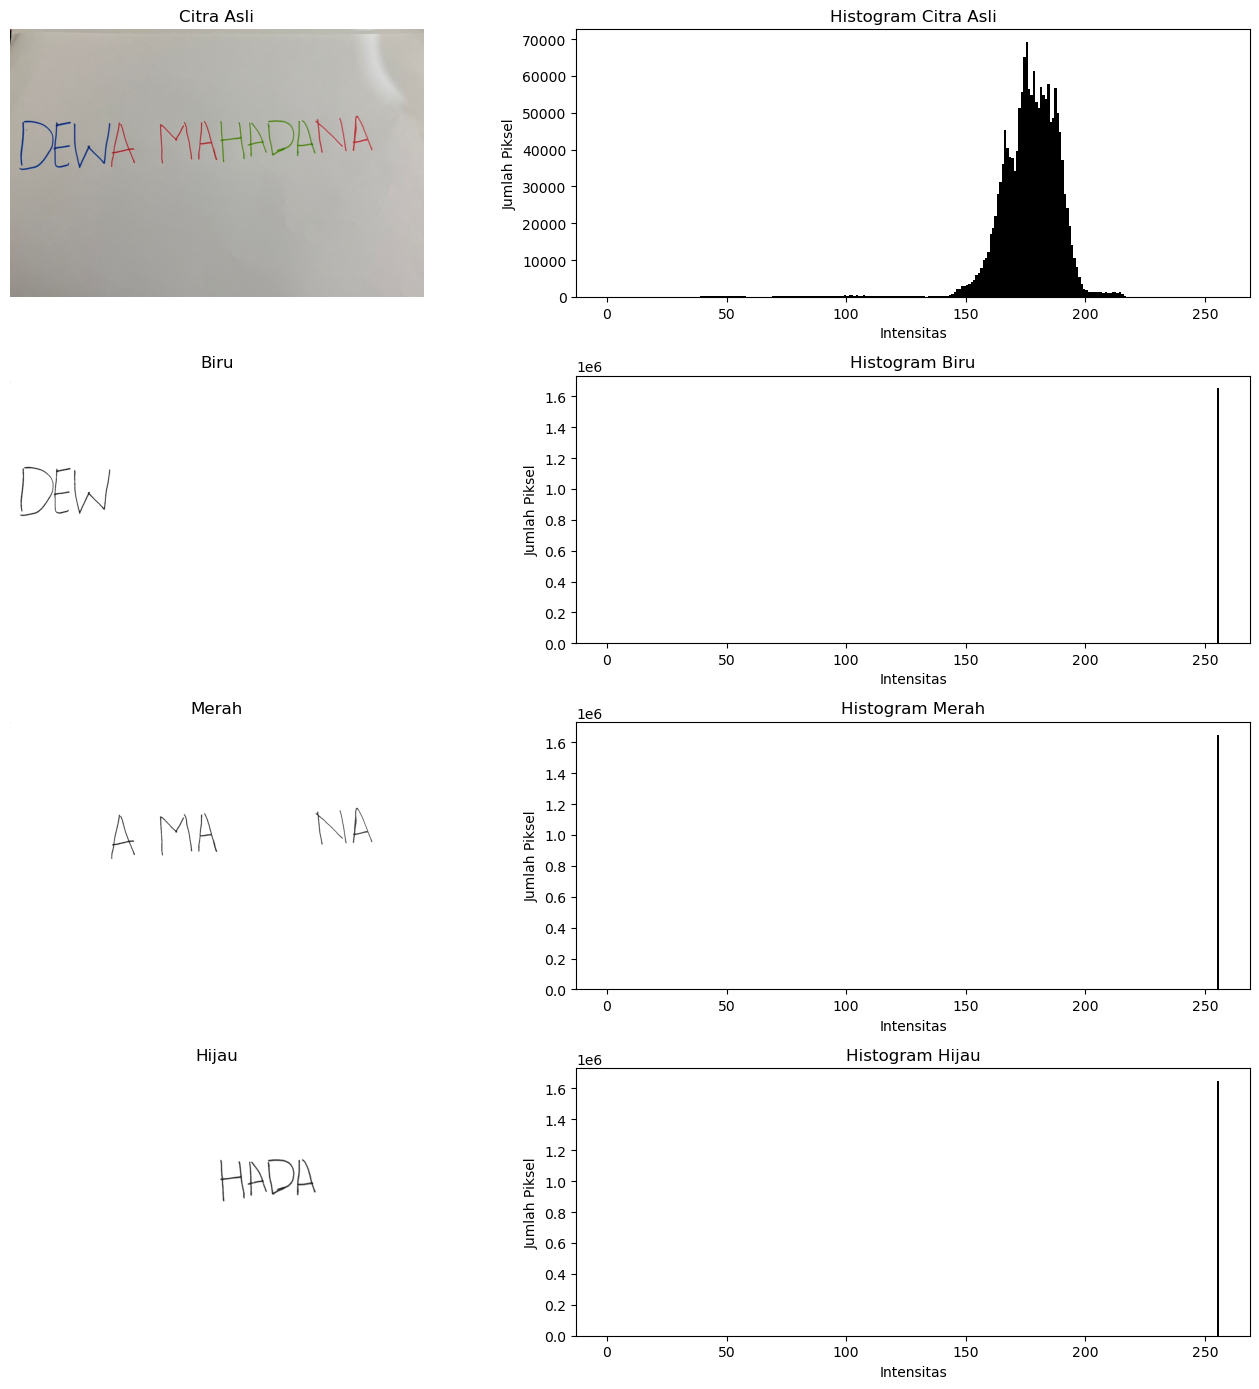

In [163]:
# Menampilkan citra dan histogram dengan axs
fig, axs = plt.subplots(4, 2, figsize=(14, 14))

# Daftar judul dan citra
titles = ['Citra Asli', 'Biru', 'Merah', 'Hijau']
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB), blue, red_gray, green]
grays = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), blue, red_gray, green]

for i in range(4):
    # Tampilkan gambar
    axs[i, 0].imshow(images[i] if i == 0 else images[i], cmap=None if i == 0 else 'gray')
    axs[i, 0].set_title(titles[i])
    axs[i, 0].axis('off')

    # Tampilkan histogram
    axs[i, 1].hist(grays[i].ravel(), bins=256, range=[0, 256], color='black')
    axs[i, 1].set_title(f'Histogram {titles[i]}')
    axs[i, 1].set_xlabel('Intensitas')
    axs[i, 1].set_ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

In [173]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [195]:
# Load gambar
img = cv2.imread('NAMA.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [197]:
# Pisahkan channel warna
r = img_rgb[:, :, 0]
g = img_rgb[:, :, 1]
b = img_rgb[:, :, 2]

In [199]:
# Buat gambar berdasarkan kategori warna
none = np.zeros_like(img_rgb)
blue = np.where((b > 120) & (r < 100) & (g < 100), 255, 0).astype(np.uint8)
red = np.where((r > 120) & (g < 100) & (b < 100), 255, 0).astype(np.uint8)
green = np.where((g > 120) & (r < 100) & (b < 100), 255, 0).astype(np.uint8)

In [201]:
# Gabungkan kategori warna
red_blue = cv2.bitwise_or(red, blue)
red_green_blue = cv2.bitwise_or(red_blue, green)

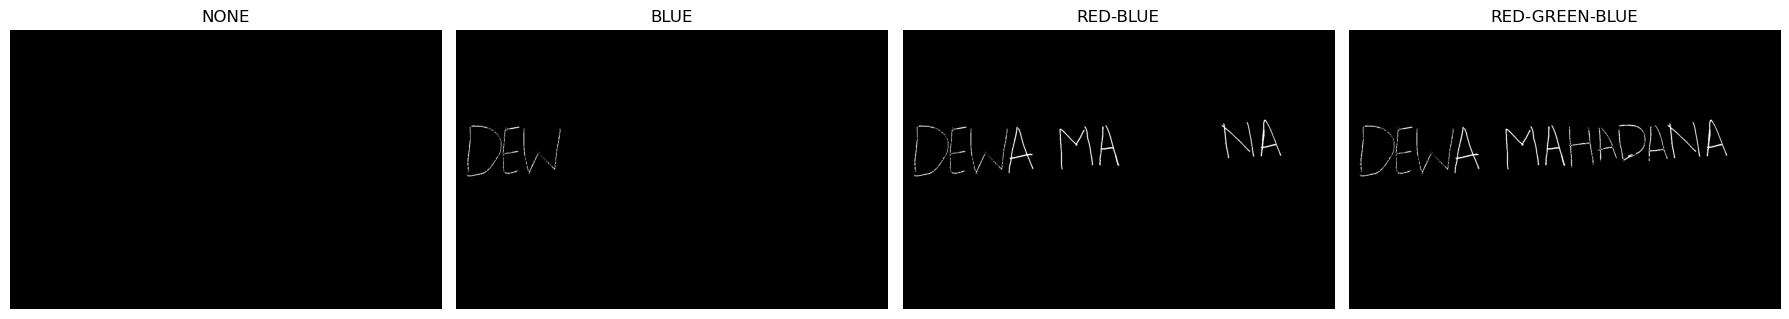

In [211]:
# Plot hasil (tanpa black_bg_white_text dan citra asli)
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

axs[0].imshow(none)
axs[0].set_title('NONE')
axs[0].axis('off')

axs[1].imshow(blue, cmap='gray')
axs[1].set_title('BLUE')
axs[1].axis('off')

axs[2].imshow(red_blue, cmap='gray')
axs[2].set_title('RED-BLUE')
axs[2].axis('off')

axs[3].imshow(red_green_blue, cmap='gray')
axs[3].set_title('RED-GREEN-BLUE')
axs[3].axis('off')

plt.tight_layout()
plt.show()

In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
# Load the image
image_path = "SELFIE.jpg"
image = cv2.imread(image_path)

In [5]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
# Enhance brightness and contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray_image)

In [9]:
# Tambahkan peningkatan kontras pada gambar grayscale
# Pertama kita konversi grayscale ke format PIL untuk editing
gray_pil = Image.fromarray(gray_image)
enhancer_contrast = ImageEnhance.Contrast(gray_pil)
gray_contrast = enhancer_contrast.enhance(2.0)  # Kontras 2x lebih tinggi

In [11]:
# Gabungkan peningkatan kecerahan (CLAHE) + kontras
enhanced_gray_pil = Image.fromarray(enhanced_gray)
enhancer_contrast2 = ImageEnhance.Contrast(enhanced_gray_pil)
enhanced_gray_brightness_contrast = enhancer_contrast2.enhance(2.0)

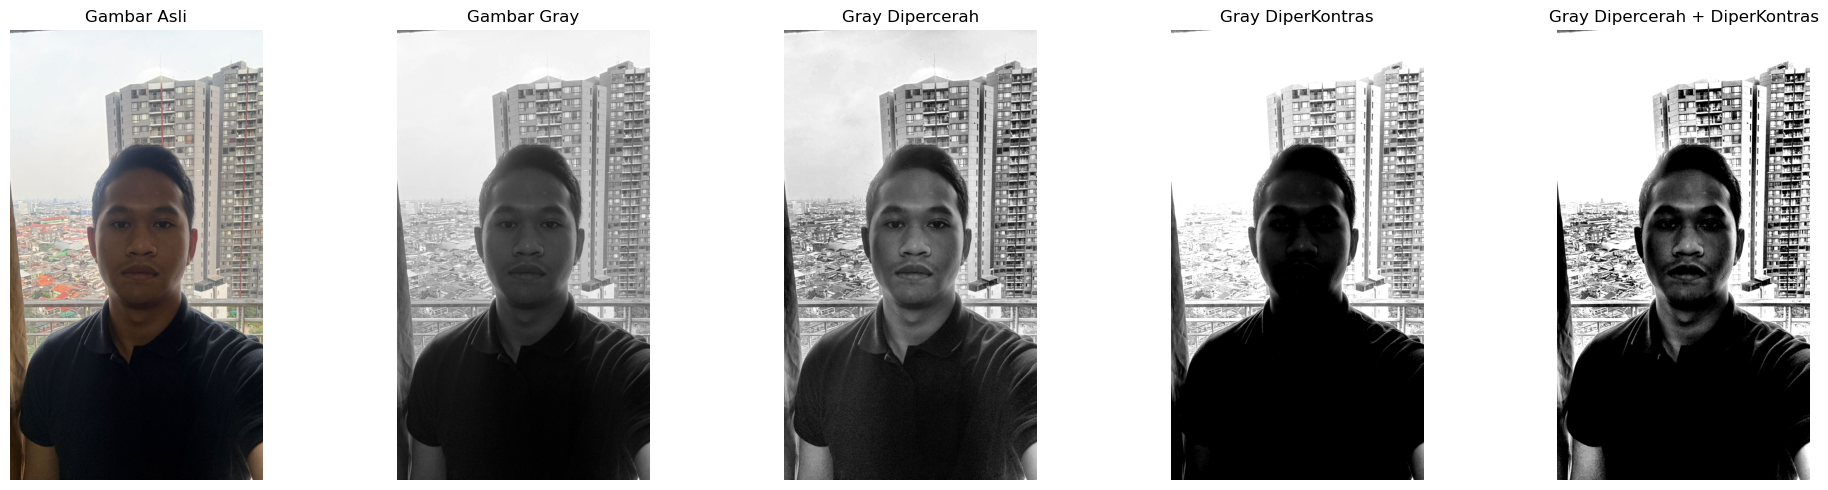

In [13]:
# Plot semua gambar termasuk tambahan baru
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Gambar Asli")
axs[0].axis("off")

axs[1].imshow(gray_image, cmap='gray')
axs[1].set_title("Gambar Gray")
axs[1].axis("off")

axs[2].imshow(enhanced_gray, cmap='gray')
axs[2].set_title("Gray Dipercerah")
axs[2].axis("off")

axs[3].imshow(gray_contrast, cmap='gray')
axs[3].set_title("Gray DiperKontras")
axs[3].axis("off")

axs[4].imshow(enhanced_gray_brightness_contrast, cmap='gray')
axs[4].set_title("Gray Dipercerah + DiperKontras")
axs[4].axis("off")

plt.tight_layout()
plt.show()